In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
# load final clean dataset

df = pd.read_csv('merged_clean_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79154 entries, 0 to 79153
Data columns (total 34 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   provincename                                                                       79154 non-null  object 
 1   Longitude                                                                          79154 non-null  float64
 2   Latitude                                                                           79154 non-null  float64
 3   Region.Name                                                                        79154 non-null  object 
 4   Date/Time                                                                          79154 non-null  object 
 5   Utilities                                                                          70198 non-null  flo

In [4]:
# convert 'Date/Time' to datetime format

df['Date/Time'] = pd.to_datetime(df['Date/Time'])

# convert 'GeoUID' to string

df['GeoUID'] = df['GeoUID'].astype('str')

In [5]:
# set date time as index
df.set_index('Date/Time', inplace = True)

## All 5 provinces ##
**Forecasting: Mean Max Temp (°C)**

In [6]:
# split data into numeric and string
num_cols = df.select_dtypes(include = ['number'])
cat_cols = df.select_dtypes(include = ['object'])

# resample numeric data
resampled_num = num_cols.resample("M").mean()

# resample string data
resampled_cat = cat_cols.resample('M').apply(lambda x: x.value_counts().idxmax())

# combine resampled data
resampled_data_M = pd.concat([resampled_num, resampled_cat], axis = 1)
print(type(resampled_data_M))

# resampled_data = df.resample('M').mean()
# print(resampled_data)

<class 'pandas.core.frame.DataFrame'>


In [10]:
resampled_data_M

,Longitude,Latitude,Utilities,Construction,Manufacturing,Transportation and warehousing,Educational services,Health care and social assistance,Accommodation and food services,Other services except public administration,...,Total Snow (cm),Total Precip (mm),Snow Grnd Last Day (cm),Dir of Max Gust (10s deg),Spd of Max Gust (km/h),provincename,Region.Name,GeoUID,Station Name,Climate ID
Date/Time,,,,,,,,,,,,,,,,,,,,,
1998-01-31,-102.136944,49.107614,21.688108,70.615231,137.183962,52.522178,62.801419,81.097770,27.387014,23.360061,...,30.951206,104.215818,16.050938,0.490617,1.300268,British Columbia,Greater Vancouver A (RDA),5915020,ENTRANCE ISLAND,709CEE9
1998-02-28,-102.136944,49.107614,21.738264,70.436829,137.828016,52.486863,63.609103,81.550047,27.811086,23.148494,...,9.074263,59.735925,14.227882,0.364611,1.032172,British Columbia,Greater Vancouver A (RDA),5915020,ENTRANCE ISLAND,709CEE9
1998-03-31,-102.136944,49.107614,22.188931,69.498260,138.074739,52.422953,61.305106,81.628418,27.125676,23.239614,...,17.075335,66.314477,5.179625,0.321716,1.217158,British Columbia,Greater Vancouver A (RDA),5915020,ENTRANCE ISLAND,709CEE9
1998-04-30,-102.197200,49.138080,21.715617,69.111249,137.733813,51.810442,64.350804,82.045808,26.787752,23.391011,...,2.756800,41.325333,0.141333,0.376000,1.261333,British Columbia,Greater Vancouver A (RDA),5915020,ENTRANCE ISLAND,709CEE9
1998-05-31,-102.253138,49.136170,21.985294,68.912567,137.630568,51.795633,63.475047,81.122386,27.110225,23.364599,...,0.022606,53.493617,0.000000,0.484043,1.409574,British Columbia,Greater Vancouver A (RDA),5915020,ENTRANCE ISLAND,709CEE9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-30,-110.889748,50.014574,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.006309,36.340379,0.024000,9.003155,25.621451,British Columbia,Greater Vancouver A (RDA),5915020,ENTRANCE ISLAND,3074935
2023-10-31,-110.889748,50.014574,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.566877,63.697161,1.725714,10.009464,27.697161,British Columbia,Greater Vancouver A (RDA),5915020,ENTRANCE ISLAND,3074935
2023-11-30,-110.889748,50.014574,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.642271,63.156782,2.884848,9.955836,29.135647,British Columbia,Greater Vancouver A (RDA),5915020,ENTRANCE ISLAND,3074935


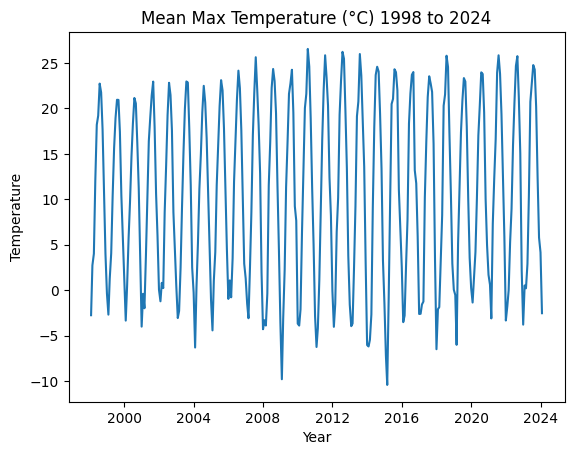

In [7]:
# plot mean max temp
plt.plot(resampled_data_M['Mean Max Temp (°C)'])
plt.title('Mean Max Temperature (°C) 1998 to 2024')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.show()

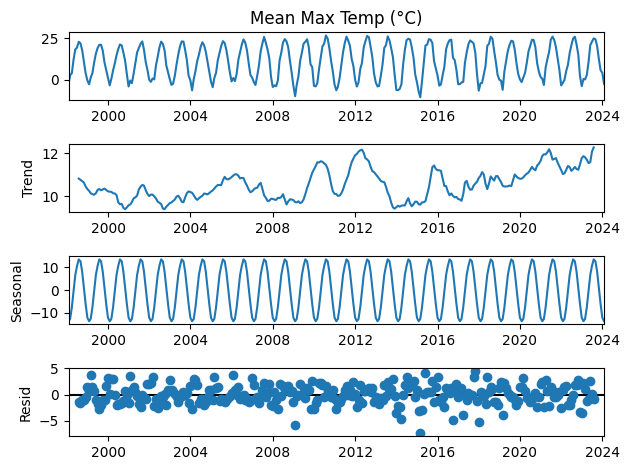

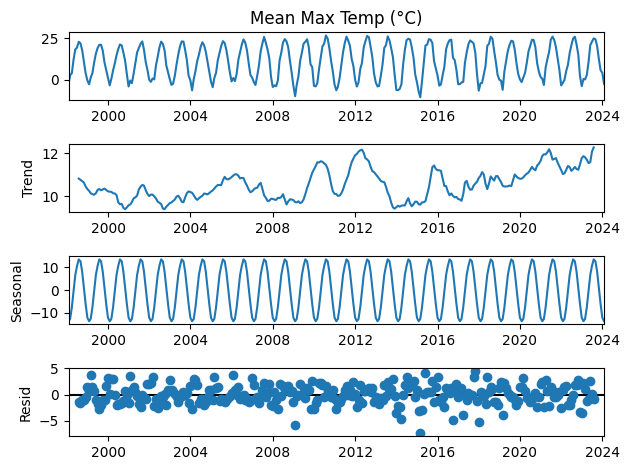

In [8]:
# seasonal decompose to separate different components (trend, seasonality, and residual)

decomp = seasonal_decompose(resampled_data_M['Mean Max Temp (°C)'],
                            period = 12)

decomp.plot()

Dicky-Fuller test

In [57]:
adfuller_result = adfuller(resampled_data_M['Mean Max Temp (°C)'])
test_statistic, p_value, num_lags, num_obs, critical_values, aic = adfuller_result
print(adfuller_result)

# Print ADF test result along with elements
print(f"ADF Test Result:")
print(f"Test Statistic: {test_statistic}")
print(f"P-value: {p_value}")
print(f"Number of Lags: {num_lags}")
print(f"Number of Observations: {num_obs}")
print("Critical Values:")
for key, value in critical_values.items():
    print(f"  {key}: {value}")
print(f"Estimated maximized information criterion (aic): {aic}")

if p_value > 0.05:
    print('Data is non-stationary. Needs to be converted to stationary data.')
else:
    print('Data is stationary. Can proceed with model creation.')

(-3.572539236030685, 0.006308248779781542, 16, 296, {'1%': -3.452636878592149, '5%': -2.8713543954331433, '10%': -2.5719993576515705}, 1226.7813956569635)
ADF Test Result:
Test Statistic: -3.572539236030685
P-value: 0.006308248779781542
Number of Lags: 16
Number of Observations: 296
Critical Values:
  1%: -3.452636878592149
  5%: -2.8713543954331433
  10%: -2.5719993576515705
Estimated maximized information criterion (aic): 1226.7813956569635
Data is stationary. Can proceed with model creation.


ACF and PACF

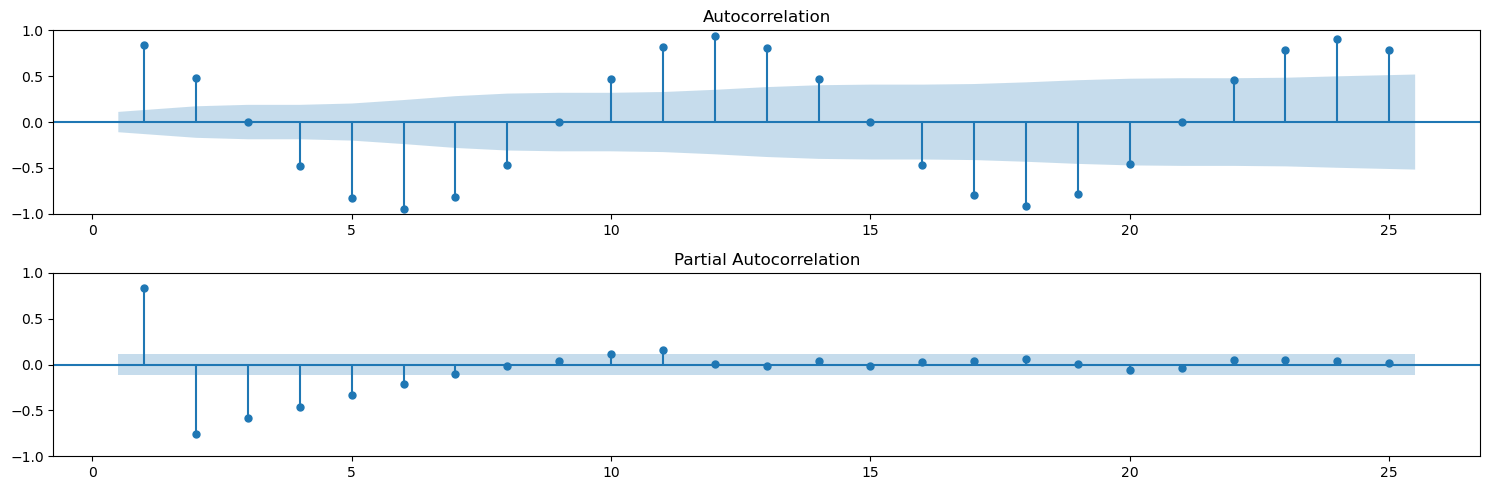

In [58]:
# create figure
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (15, 5))

# plot acf
plot_acf(resampled_data_M['Mean Max Temp (°C)'], zero = False, ax = ax1)

# plot pacf
plot_pacf(resampled_data_M['Mean Max Temp (°C)'],   zero = False, ax = ax2)

plt.tight_layout()
plt.show()

ARIMA model

In [14]:
# Create empty list to store search results
order_aic_bic=[]
# Loop over p values from 0-4 (Use the partial autocorrelation)
for p in range(5):
# Loop over q values from 0-4 (Use the autocorrelation)
    for q in range(5):
        try:
            # Create and fit ARIMA(p,d,q) model
            model = sm.tsa.ARIMA(resampled_data_M['Mean Max Temp (°C)'], order=(p,0,q), trend='c')
            results = model.fit()
            # Append order and results tuple
            order_aic_bic.append((p,q,results.aic, results.bic))
        except:
            print(p, q, None, None)

c:\Users\chust\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\chust\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\chust\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\chust\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\chust\anaconda3\Lib\site-packages\statsmodels\t

In [15]:
# Construct DataFrame from order_aic_bic
order_df = pd.DataFrame(order_aic_bic,
                        columns=['p', 'q', 'AIC', 'BIC'])

# Print order_df in order of increasing AIC
print(order_df.sort_values('AIC'))

# Print order_df in order of increasing BIC
print(order_df.sort_values('BIC'))

    p  q          AIC          BIC
13  2  3  1290.124450  1316.347872
22  4  2  1292.955578  1322.925203
17  3  2  1293.177881  1319.401304
23  4  3  1293.999393  1327.715221
12  2  2  1296.300248  1318.777467
14  2  4  1298.351242  1328.320867
18  3  3  1298.512326  1328.481951
24  4  4  1304.531630  1341.993662
19  3  4  1306.936793  1340.652622
21  4  1  1367.515940  1393.739362
16  3  1  1393.950876  1416.428095
20  4  0  1423.547617  1446.024837
11  2  1  1436.929680  1455.660696
15  3  0  1512.463567  1531.194583
10  2  0  1637.381445  1652.366258
4   0  4  1718.075567  1740.552787
7   1  2  1760.379744  1779.110760
9   1  4  1761.379585  1787.603007
3   0  3  1781.205601  1799.936617
6   1  1  1818.663351  1833.648164
8   1  3  1858.121507  1880.598726
2   0  2  1871.526488  1886.511301
5   1  0  1943.282386  1954.520996
1   0  1  2033.283640  2044.522250
0   0  0  2330.172568  2337.664974
    p  q          AIC          BIC
13  2  3  1290.124450  1316.347872
12  2  2  1296.30024

In [16]:
#to check the minimum value in the dataframe
order_df.AIC.min()

1290.1244501143124

In [17]:
#to check the minimum value in the dataframe
order_df.BIC.min()

1316.3478724480935

In [59]:
# Instantiate the model
#model = sm.tsa.ARIMA(milk_prod_diff, order=(9, 0, 4)) #order=(p,d,q)

model = sm.tsa.ARIMA(resampled_data_M['Mean Max Temp (°C)'], order=(2, 0, 3)) #order=(p,d,q)

# Fit the model
results = model.fit()

# Print model fit summary
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:     Mean Max Temp (°C)   No. Observations:                  313
Model:                 ARIMA(2, 0, 3)   Log Likelihood                -638.062
Date:                Sun, 17 Mar 2024   AIC                           1290.124
Time:                        23:53:56   BIC                           1316.348
Sample:                    01-31-1998   HQIC                          1300.604
                         - 01-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.5429      0.129     81.491      0.000      10.289      10.796
ar.L1          1.7320      0.001   2601.372      0.000       1.731       1.733
ar.L2         -0.9998      0.000  -3217.466      0.0

c:\Users\chust\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Split data to train and test dataset

In [60]:
# split data to train and test

train = resampled_data_M.loc[resampled_data_M.index <= '2022-01-01']
test = resampled_data_M.loc[resampled_data_M.index > '2022-01-01']

In [62]:
#to fit the model after splitting the data

# Instantiate the model
model = sm.tsa.ARIMA(train['Mean Max Temp (°C)'], order=(2, 0, 3)) #order=(p,d,q)

# Fit the model
results_1 = model.fit()


c:\Users\chust\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [63]:
#get the predictions
predictions = results_1.get_forecast(steps=36)
# Extract prediction mean
mean_predictions =predictions.predicted_mean

In [64]:
mean_predictions

2022-01-31    -3.672103
2022-02-28    -1.797250
2022-03-31     2.996295
2022-04-30     9.786496
2022-05-31    16.754163
2022-06-30    22.033002
2022-07-31    24.209508
2022-08-31    22.701452
2022-09-30    17.913635
2022-10-31    11.129227
2022-11-30     4.165868
2022-12-31    -1.111302
2023-01-31    -3.289225
2023-02-28    -1.785291
2023-03-31     2.996803
2023-04-30     9.775420
2023-05-31    16.734473
2023-06-30    22.009973
2023-07-31    24.189309
2023-08-31    22.689493
2023-09-30    17.913117
2023-10-31    11.140286
2023-11-30     4.185540
2023-12-31    -1.088290
2024-01-31    -3.269035
2024-02-29    -1.773332
2024-03-31     2.997330
2024-04-30     9.764378
2024-05-31    16.714820
2024-06-30    21.986977
2024-07-31    24.169129
2024-08-31    22.677534
2024-09-30    17.912580
2024-10-31    11.151312
2024-11-30     4.205172
2024-12-31    -1.065310
Freq: M, Name: predicted_mean, dtype: float64

In [65]:
test['Mean Max Temp (°C)']#.loc['2022-01-31':'2024-12-31']

Date/Time
2022-01-31    -1.902235
2022-02-28    -0.220802
2022-03-31     5.097507
2022-04-30     9.034053
2022-05-31    16.039724
2022-06-30    20.649357
2022-07-31    24.658194
2022-08-31    25.576209
2022-09-30    20.971759
2022-10-31    14.621617
2022-11-30     2.275261
2022-12-31    -3.565782
2023-01-31     0.030103
2023-02-28    -0.067712
2023-03-31     2.896828
2023-04-30    10.324771
2023-05-31    20.216312
2023-06-30    22.415759
2023-07-31    24.656140
2023-08-31    24.081518
2023-09-30    19.889953
2023-10-31    12.078007
2023-11-30     5.460168
2023-12-31     3.200644
2024-01-31    -2.620875
Freq: M, Name: Mean Max Temp (°C), dtype: float64

In [66]:
# to calculate MAPE and RSME
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

arima_MAE = mean_absolute_error(test['Mean Max Temp (°C)'].loc['2022-01-31':'2024-01-31'], mean_predictions.loc['2022-01-31':'2024-01-31'])
print('Arima_MAE:', arima_MAE)

arima_MAPE = mean_absolute_percentage_error(test['Mean Max Temp (°C)'].loc['2022-01-31':'2024-01-31'], mean_predictions.loc['2022-01-31':'2024-01-31'])
print('Arima_MAPE:', arima_MAPE)

arima_RMSE = np.sqrt(mean_squared_error(test['Mean Max Temp (°C)'].loc['2022-01-31':'2024-01-31'], mean_predictions.loc['2022-01-31':'2024-01-31']))
print('Arima_RMSE:', arima_RMSE)


Arima_MAE: 1.7230437301404666
Arima_MAPE: 5.947806601468377
Arima_RMSE: 2.064823236521601


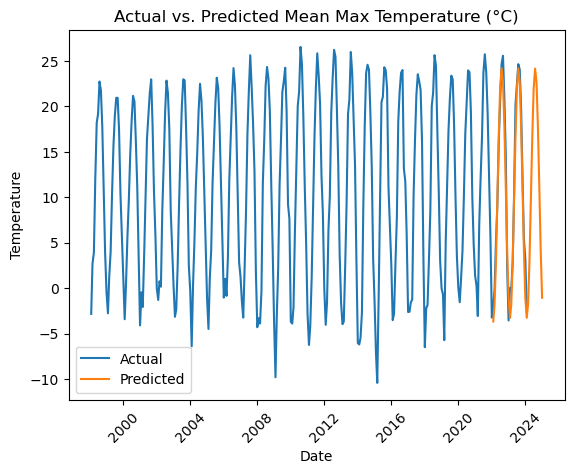

In [67]:
# plot actual data and predictions

plt.plot(resampled_data_M.index, resampled_data_M['Mean Max Temp (°C)'], label='Actual')

plt.plot(mean_predictions.index, mean_predictions.values, label='Predicted')

plt.title('Actual vs. Predicted Mean Max Temperature (°C)')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.xticks(rotation=45)

plt.show()

## Ontario ##
**Forecasting: Agriculture**

In [26]:
# to filter ON province:

ontario = df[df['provincename'] == 'Ontario']

In [27]:
ontario = ontario[ontario.index.year < 2022]

In [28]:
# split data into number and object
num_cols = ontario.select_dtypes(include = ['number'])
cat_cols = ontario.select_dtypes(include = ['object'])

# to resample num data into monthly frequency
resampled_num = num_cols.resample(rule = 'M').mean()

# to resample cat data into monthly frequency
resampled_cat = cat_cols.resample(rule = 'M').apply(lambda x: x.value_counts().idxmax())

# combine resampled num and cat data
resampled_ON = pd.concat([resampled_num, resampled_cat], axis = 1)

In [29]:
ontario.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8701 entries, 1998-01-01 to 2021-12-01
Data columns (total 33 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   provincename                                                                       8701 non-null   object 
 1   Longitude                                                                          8701 non-null   float64
 2   Latitude                                                                           8701 non-null   float64
 3   Region.Name                                                                        8701 non-null   object 
 4   Utilities                                                                          8701 non-null   float64
 5   Construction                                                                       870

In [30]:
print(ontario.index.min())
print(ontario.index.max())

1998-01-01 00:00:00
2021-12-01 00:00:00


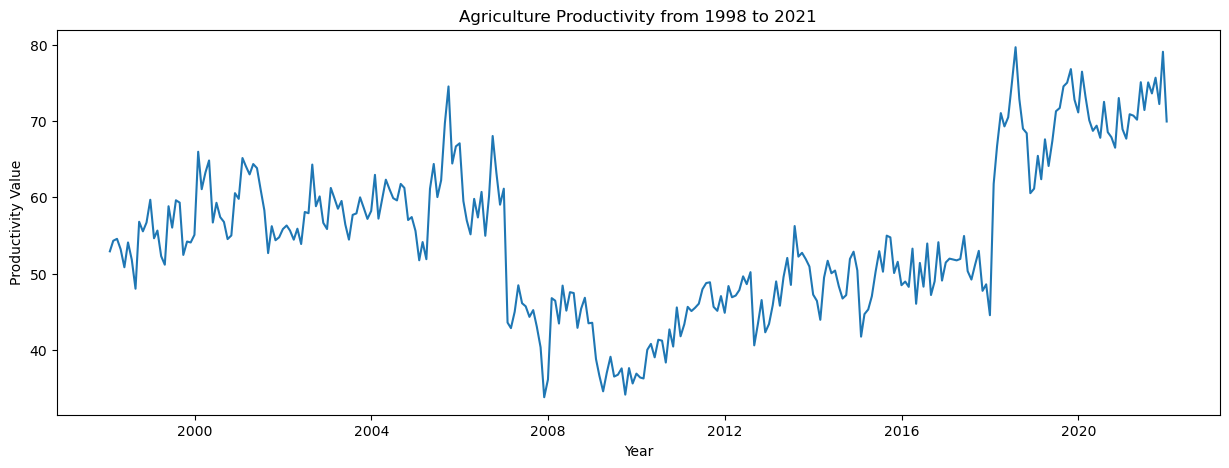

In [31]:
# plot the utililities
plt.figure(figsize = (15, 5))
plt.plot(resampled_ON['Agriculture forestry fishing hunting, Mining quarrying and oil and gas extraction'])
plt.title('Agriculture Productivity from 1998 to 2021')
plt.xlabel('Year')
plt.ylabel('Productivity Value')
plt.show()

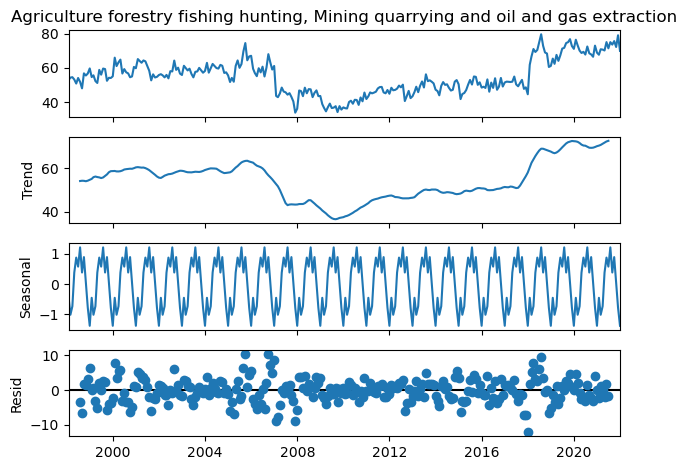

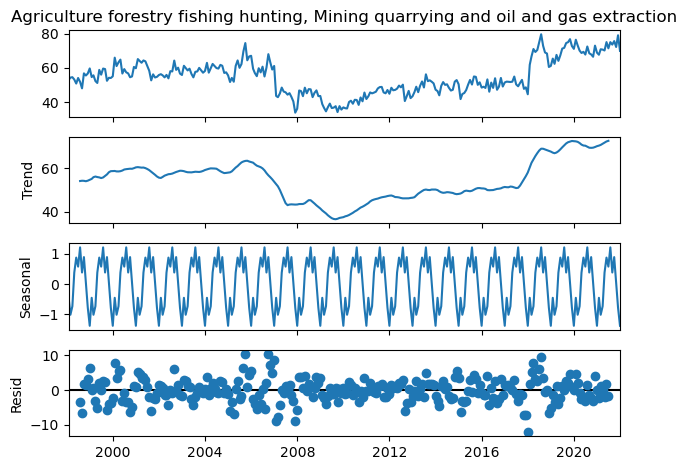

In [32]:
# to check different components (trend, seasonality, and residual)

decomp_ON = seasonal_decompose(resampled_ON['Agriculture forestry fishing hunting, Mining quarrying and oil and gas extraction'],
                               period = 12)

decomp_ON.plot()

Dicky-Fuller Test

In [33]:
adfuller_result = adfuller(resampled_ON['Agriculture forestry fishing hunting, Mining quarrying and oil and gas extraction'])
adfuller_result = adfuller(resampled_ON['Agriculture forestry fishing hunting, Mining quarrying and oil and gas extraction'])
test_statistic, p_value, num_lags, num_obs, critical_values, aic = adfuller_result
print(adfuller_result)

# Print ADF test result along with elements
print(f"ADF Test Result:")
print(f"Test Statistic: {test_statistic}")
print(f"P-value: {p_value}")
print(f"Number of Lags: {num_lags}")
print(f"Number of Observations: {num_obs}")
print("Critical Values:")
for key, value in critical_values.items():
    print(f"  {key}: {value}")
print(f"Estimated maximized information criterion (aic): {aic}")

if p_value > 0.05:
    print('Data is non-stationary. Needs to be converted to stationary data.')
else:
    print('Data is stationary. Can proceed with model creation.')

(-2.2244320044855024, 0.19749783622467093, 1, 286, {'1%': -3.4534232986669546, '5%': -2.8716994185534745, '10%': -2.5721833625116144}, 1483.2074409605557)
ADF Test Result:
Test Statistic: -2.2244320044855024
P-value: 0.19749783622467093
Number of Lags: 1
Number of Observations: 286
Critical Values:
  1%: -3.4534232986669546
  5%: -2.8716994185534745
  10%: -2.5721833625116144
Estimated maximized information criterion (aic): 1483.2074409605557
Data is non-stationary. Needs to be converted to stationary data.


In [34]:
# transforming data to stationary data

# differencing

resampled_ON_diff = resampled_ON['Agriculture forestry fishing hunting, Mining quarrying and oil and gas extraction'].diff(periods = 2).dropna()
resampled_ON_diff

Date/Time
1998-03-31    1.640896
1998-04-30   -1.110992
1998-05-31   -3.733965
1998-06-30    0.890058
1998-07-31    1.002426
                ...   
2021-08-31    2.178425
2021-09-30    0.614057
2021-10-31   -1.394894
2021-11-30    3.409796
2021-12-31   -2.291200
Freq: M, Name: Agriculture forestry fishing hunting, Mining quarrying and oil and gas extraction, Length: 286, dtype: float64

In [35]:
adfuller_result = adfuller(resampled_ON_diff)
test_statistic, p_value, num_lags, num_obs, critical_values, aic = adfuller_result
print(adfuller_result)

# Print ADF test result along with elements
print(f"ADF Test Result:")
print(f"Test Statistic: {test_statistic}")
print(f"P-value: {p_value}")
print(f"Number of Lags: {num_lags}")
print(f"Number of Observations: {num_obs}")
print("Critical Values:")
for key, value in critical_values.items():
    print(f"  {key}: {value}")
print(f"Estimated maximized information criterion (aic): {aic}")

if p_value > 0.05:
    print('Data is non-stationary. Needs to be converted to stationary data.')
else:
    print('Data is stationary. Can proceed with model creation.')

(-4.411990290013513, 0.00028266033924551895, 14, 271, {'1%': -3.4547128138328875, '5%': -2.8722649771800155, '10%': -2.5724850011573914}, 1484.4594978642592)
ADF Test Result:
Test Statistic: -4.411990290013513
P-value: 0.00028266033924551895
Number of Lags: 14
Number of Observations: 271
Critical Values:
  1%: -3.4547128138328875
  5%: -2.8722649771800155
  10%: -2.5724850011573914
Estimated maximized information criterion (aic): 1484.4594978642592
Data is stationary. Can proceed with model creation.


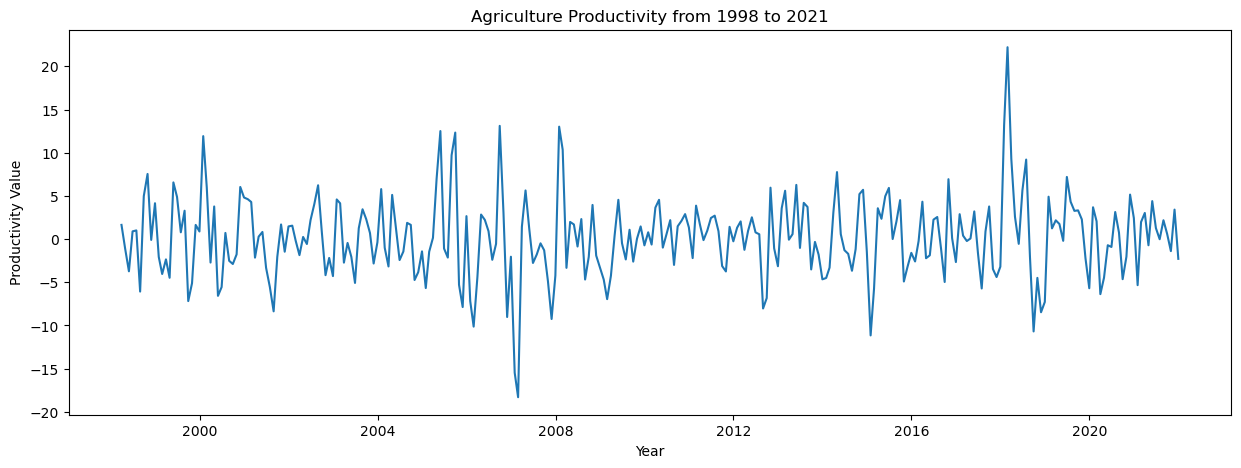

In [36]:
# plotting the transformed data

# plot the utililities
plt.figure(figsize = (15, 5))
plt.plot(resampled_ON_diff)
plt.title('Agriculture Productivity from 1998 to 2021')
plt.xlabel('Year')
plt.ylabel('Productivity Value')
plt.show()

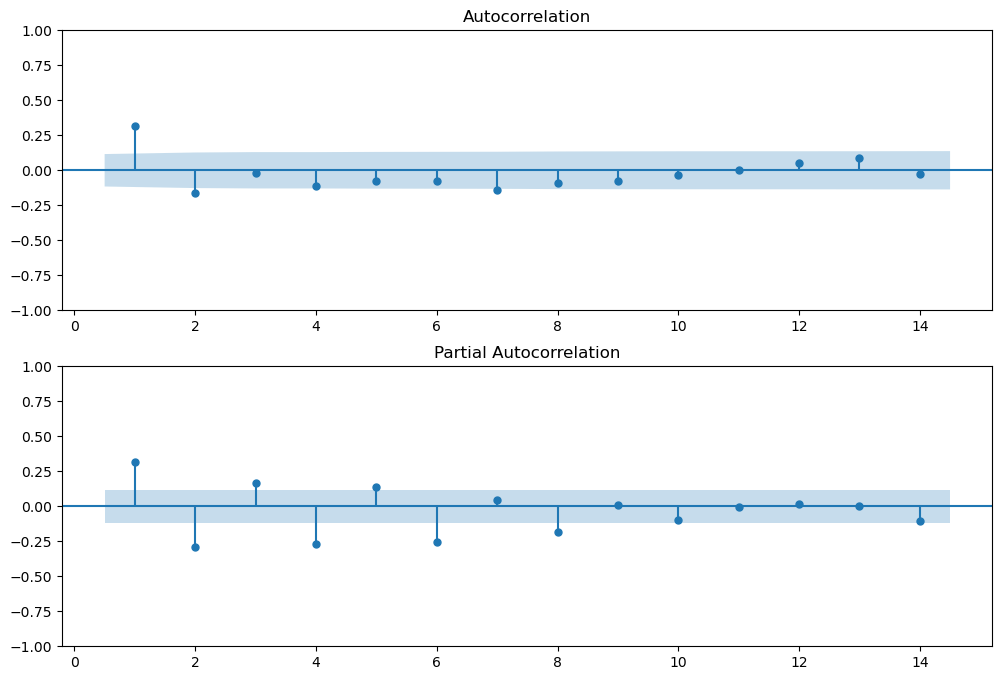

In [37]:
# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))

# Plot the ACF on ax1
plot_acf(resampled_ON_diff, lags=14, zero=False, ax=ax1)
# plot_acf(resampled_ON_diff, zero=False, ax=ax1)

# Plot the PACF of on ax2
plot_pacf(resampled_ON_diff, lags=14, zero=False, ax=ax2)
# plot_pacf(resampled_ON_diff, zero=False, ax=ax2)

plt.show()

SARIMAX MODEL

In [39]:
# Create empty list to store search results
order_aic_bic=[]
# Loop over p values (Use the partial autocorrelation)
for p in range(14):
# Loop over q values (Use the autocorrelation)
    for q in range(14):
        try:
            # Create and fit SARIMAX(p,d,q) model
            model = sm.tsa.SARIMAX(resampled_ON_diff, order=(p,0,q), trend='c')
            results = model.fit()
            # Append order and results tuple
            order_aic_bic.append((p,q,results.aic, results.bic))
        except:
            print(p, q, None, None)

c:\Users\chust\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\chust\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\chust\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\chust\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\chust\anaconda3\Lib\site-packages\statsmodels\tsa\state

In [40]:
# Construct DataFrame from order_aic_bic
order_df = pd.DataFrame(order_aic_bic,
                        columns=['p', 'q', 'AIC', 'BIC'])

# Print order_df in order of increasing AIC
print(order_df.sort_values('AIC'))

# Print order_df in order of increasing BIC
print(order_df.sort_values('BIC'))

    p  q          AIC          BIC
32  2  4  1565.441658  1594.689593
59  4  3  1566.219836  1599.123763
60  4  4  1566.410394  1602.970312
5   0  5  1566.918215  1592.510157
62  4  6  1567.063181  1610.935083
.. .. ..          ...          ...
56  4  0  1617.274432  1639.210383
42  3  0  1637.087636  1655.367595
28  2  0  1643.554348  1658.178315
14  1  0  1667.317647  1678.285623
0   0  0  1695.993818  1703.305802

[196 rows x 4 columns]
      p   q          AIC          BIC
2     0   2  1569.495489  1584.119456
16    1   2  1568.097078  1586.377037
15    1   1  1571.952662  1586.576630
30    2   2  1567.219652  1589.155603
29    2   1  1570.902784  1589.182743
..   ..  ..          ...          ...
193  13  11  1585.711275  1680.767062
180  12  12  1587.024276  1682.080063
194  13  12  1589.525255  1688.237034
195  13  13  1589.634709  1692.002480
0     0   0  1695.993818  1703.305802

[196 rows x 4 columns]


In [42]:
#to check the minimum value in the dataframe
print("AIC_min:", order_df.AIC.min())

#to check the minimum value in the dataframe
print('BIC_min:', order_df.BIC.min())

AIC_min: 1565.4416584279572
BIC_min: 1584.119455815274


In [41]:
# Instantiate the model

model = sm.tsa.SARIMAX(resampled_ON_diff, order=(2, 0, 4)) #order=(p,d,q)

# Fit the model
results = model.fit()

# Print model fit summary
print(results.summary())

                                                               SARIMAX Results                                                               
Dep. Variable:     Agriculture forestry fishing hunting, Mining quarrying and oil and gas extraction   No. Observations:                  286
Model:                                                                              SARIMAX(2, 0, 4)   Log Likelihood                -774.931
Date:                                                                               Sun, 17 Mar 2024   AIC                           1563.862
Time:                                                                                       23:49:12   BIC                           1589.454
Sample:                                                                                   03-31-1998   HQIC                          1574.120
                                                                                        - 12-31-2021                                         
Covari

In [42]:
# Generate predictions
one_step_forecast = results.get_prediction(start=-48)

# Extract prediction mean
mean_forecast = one_step_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = one_step_forecast.conf_int()

confidence_intervals.head().T
# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower Agriculture forestry fishing hunting, Mining quarrying and oil and gas extraction']
upper_limits = confidence_intervals.loc[:,'upper Agriculture forestry fishing hunting, Mining quarrying and oil and gas extraction']

# Print best estimate predictions
print(mean_forecast)

Date/Time
2018-01-31    -1.868159
2018-02-28    12.183818
2018-03-31     2.872523
2018-04-30     1.024483
2018-05-31    -2.195906
2018-06-30    -1.542246
2018-07-31     1.632003
2018-08-31    -0.151058
2018-09-30    -7.020578
2018-10-31    -5.362755
2018-11-30    -1.075766
2018-12-31    -7.053480
2019-01-31     1.516113
2019-02-28     3.191211
2019-03-31    -0.522827
2019-04-30     4.882944
2019-05-31    -0.123655
2019-06-30     3.676642
2019-07-31     4.953293
2019-08-31     0.427022
2019-09-30     3.141274
2019-10-31    -0.635928
2019-11-30     1.058332
2019-12-31    -4.766914
2020-01-31    -1.831696
2020-02-29     1.721384
2020-03-31    -3.701273
2020-04-30    -4.064375
2020-05-31    -1.134354
2020-06-30    -0.528222
2020-07-31    -0.590195
2020-08-31     3.111674
2020-09-30    -1.757663
2020-10-31     0.026091
2020-11-30     1.050431
2020-12-31     5.172038
2021-01-31    -1.429212
2021-02-28    -0.510798
2021-03-31     3.913524
2021-04-30    -0.643512
2021-05-31     0.431101
2021-0

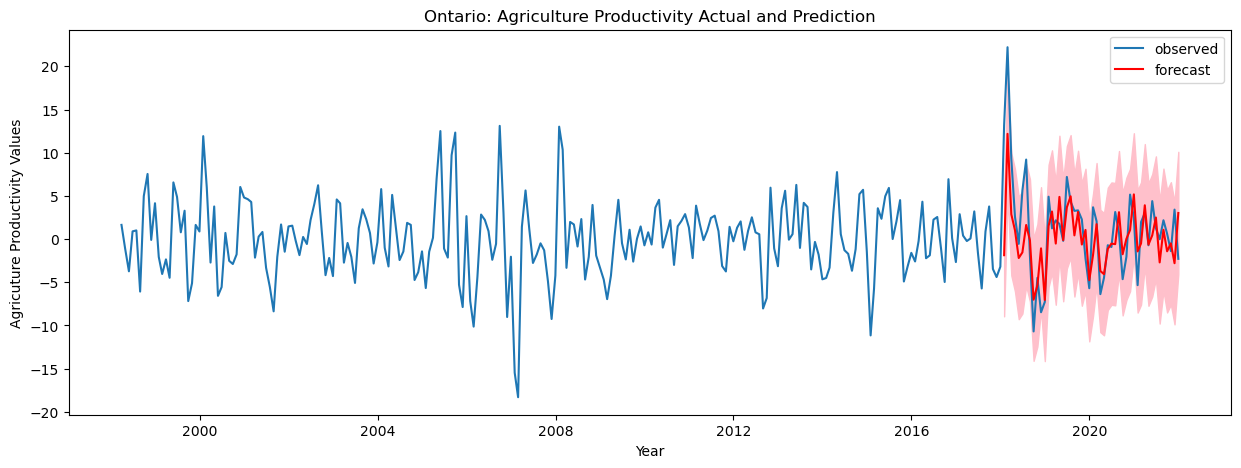

In [43]:
# plot the  data
plt.figure(figsize = (15, 5))
plt.plot(resampled_ON_diff.index, resampled_ON_diff, label='observed')

# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits,
               upper_limits, color='pink')

# set labels, legends and show plot
plt.title('Ontario: Agriculture Productivity Actual and Prediction')
plt.xlabel('Year')
plt.ylabel('Agricuture Productivity Values')
plt.legend()
plt.show()

In [44]:
# to calculate MAE, MAPE and RSME
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

sarimax_MAE = mean_absolute_error(resampled_ON_diff.loc['2018-01-31': '2021-12-31'], mean_forecast)
print('Sarimax_MAE:', sarimax_MAE)

sarimax_MAPE = mean_absolute_percentage_error(resampled_ON_diff.loc['2018-01-31': '2021-12-31'], mean_forecast)
print('Sarimax_MAPE:', sarimax_MAPE)

sarimax_RMSE = np.sqrt(mean_squared_error(resampled_ON_diff.loc['2018-01-31': '2021-12-31'], mean_forecast))
print('Sarimax_RMSE:', sarimax_RMSE)


Sarimax_MAE: 3.0718825648925105
Sarimax_MAPE: 3.5399474047469717
Sarimax_RMSE: 4.190332666109481


IGNORE BELOW

Split data to train and test dataset

In [56]:
# split data to train and test

train = resampled_ON_diff.loc[resampled_ON_diff.index <= '2020-01-01']
test = resampled_ON_diff.loc[resampled_ON_diff.index > '2020-01-01']

In [57]:
#to fit the model after splitting the data

# Instantiate the model
model = sm.tsa.ARIMA(train, order=(1, 1, 2)) #order=(p,d,q)

# Fit the model
results = model.fit()


In [58]:
#get the predictions
predictions = results.get_forecast(steps=24)
# Extract prediction mean
mean_predictions =predictions.predicted_mean
print(mean_predictions)

2020-01-31   -1.047747
2020-02-29    0.411891
2020-03-31    0.078637
2020-04-30    0.154723
2020-05-31    0.137352
2020-06-30    0.141318
2020-07-31    0.140412
2020-08-31    0.140619
2020-09-30    0.140572
2020-10-31    0.140583
2020-11-30    0.140580
2020-12-31    0.140581
2021-01-31    0.140581
2021-02-28    0.140581
2021-03-31    0.140581
2021-04-30    0.140581
2021-05-31    0.140581
2021-06-30    0.140581
2021-07-31    0.140581
2021-08-31    0.140581
2021-09-30    0.140581
2021-10-31    0.140581
2021-11-30    0.140581
2021-12-31    0.140581
Freq: M, Name: predicted_mean, dtype: float64


In [59]:
test.loc['2020-01-31': '2021-12-31']

Date/Time
2020-01-31    3.679435
2020-02-29    2.061321
2020-03-31   -6.376970
2020-04-30   -4.479538
2020-05-31   -0.716047
2020-06-30   -0.913497
2020-07-31    3.130181
2020-08-31    0.742083
2020-09-30   -4.645830
2020-10-31   -2.043999
2020-11-30    5.147226
2020-12-31    2.429975
2021-01-31   -5.337960
2021-02-28    1.969515
2021-03-31    3.022793
2021-04-30   -0.717823
2021-05-31    4.392208
2021-06-30    1.269769
2021-07-31   -0.021380
2021-08-31    2.178425
2021-09-30    0.614057
2021-10-31   -1.394894
2021-11-30    3.409796
2021-12-31   -2.291200
Freq: M, Name: Agriculture forestry fishing hunting, Mining quarrying and oil and gas extraction, dtype: float64

In [60]:
# to calculate MAPE and RSME
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

arima_MAE = mean_absolute_error(test, mean_predictions)
print('Arima_MAE:', arima_MAE)

arima_MAPE = mean_absolute_percentage_error(test, mean_predictions)
print('Arima_MAPE:', arima_MAPE)

arima_RMSE = np.sqrt(mean_squared_error(test, mean_predictions))
print('Arima_RMSE:', arima_RMSE)


Arima_MAE: 2.648816948157504
Arima_MAPE: 1.27592026524311
Arima_RMSE: 3.178484983346455


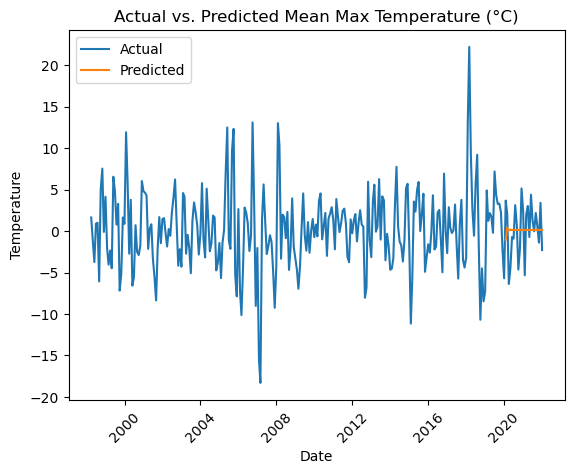

In [61]:
# plot actual data and predictions

plt.plot(resampled_ON_diff.index, resampled_ON_diff, label='Actual')

plt.plot(mean_predictions.index, mean_predictions.values, label='Predicted')

plt.title('Actual vs. Predicted Mean Max Temperature (°C)')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.xticks(rotation=45)

plt.show()